In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import warnings

In [41]:
from sklearn.metrics import auc, roc_curve, roc_auc_score, r2_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel

In [45]:
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [4]:
import xgboost as xgb

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [6]:
warnings.filterwarnings('ignore')
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [71]:
def show_auc(y, y_pred, plot_label='', prin=True):    
    fpr, tpr, _ = roc_curve(y, y_pred)
    auc_val = auc(fpr, tpr)
    if prin:
        print('ROC AUC: {0:.4f}'.format(auc_val))
    if plot_label:
        plt.plot(fpr, tpr, label=plot_label)
        plt.xlabel('FPR')
        plt.ylabel('TPR')
    return auc_val

In [7]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [8]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
df_train.shape

(1460, 81)

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

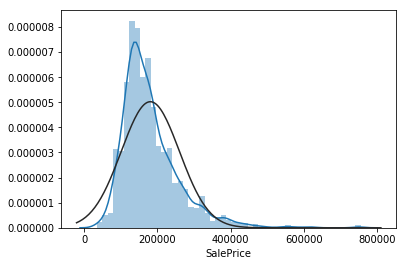

In [11]:
#исследуем целевую переменную
sns.distplot(df_train['SalePrice'], fit=stats.norm)

In [12]:
#можно прологарифмировать ее, чтобы приблизить вид распределения к нормальному
#пока не будем

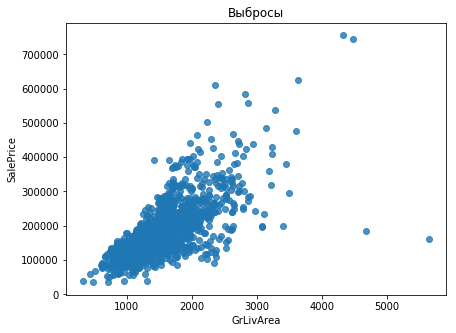

In [13]:
#можно удалить выбросы
plt.subplots(figsize=(15, 5))

plt.subplot(1, 2, 1)
g = sns.regplot(x=df_train['GrLivArea'], y=df_train['SalePrice'], fit_reg=False).set_title("Выбросы")

# пока не будем, посмотрим на результат
#plt.subplot(1, 2, 2)                                                                                
#train = train.drop(train[(train['GrLivArea']>4000)].index)
#g = sns.regplot(x=train['GrLivArea'], y=train['SalePrice'], fit_reg=False).set_title("After")

In [14]:
y_train = df_train['SalePrice'].values

df_train['is_train'] = True
df_test['is_train'] = False

df_all = pd.concat([df_train, df_test]).reset_index(drop=True)

df_all.drop(['SalePrice', 'Id'], axis=1, inplace=True)

df_all.shape

(2919, 80)

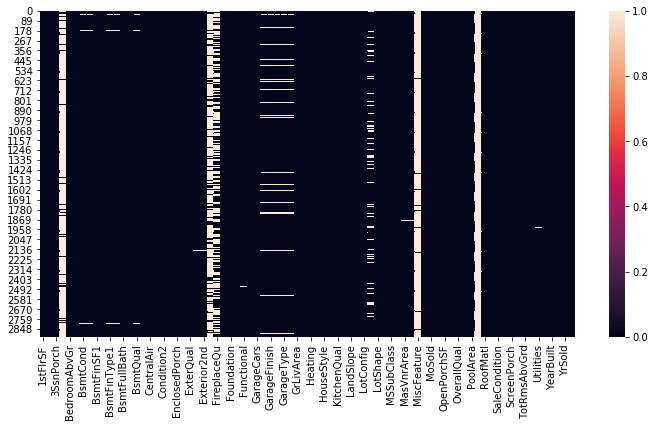

In [15]:
#посмотрим на нулевые значения
plt.figure(figsize=(12, 6))
sns.heatmap(df_all.isnull())
plt.show()

In [16]:
# используя описание данных заполним отсутствующие значения "None"
for col in ("PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu",
           "GarageType", "GarageFinish", "GarageQual", "GarageCond",
           "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1",
            "BsmtFinType2", "MSSubClass", "MasVnrType"):
    df_all[col] = df_all[col].fillna("None")

In [17]:
#здесь медианным значением по соседям
df_all["LotFrontage"] = df_all.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [18]:
#эти признаки заполним нулями
for col in ("GarageYrBlt", "GarageArea", "GarageCars", "BsmtFinSF1", 
           "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "MasVnrArea",
           "BsmtFullBath", "BsmtHalfBath"):
    df_all[col] = df_all[col].fillna(0)

In [19]:
#эти признаки заполним модой
for col in ("MSZoning", "Electrical", "KitchenQual", "Exterior1st", "Exterior2nd",
           "SaleType", "Functional"):
    df_all[col] = df_all[col].fillna(df_all[col].mode()[0])

In [20]:
#этот столбец удалим
df_all.drop(['Utilities'], axis=1, inplace=True)

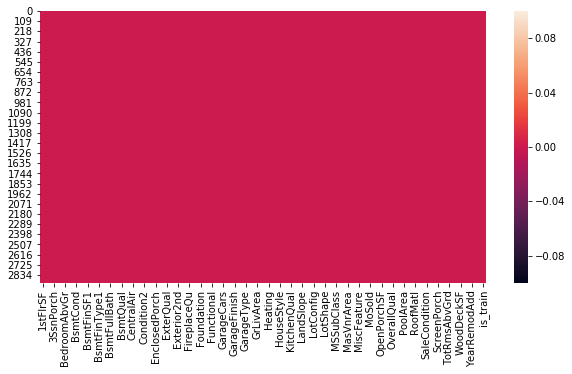

In [21]:
#остались ли пропуски?
plt.figure(figsize=(10, 5))
sns.heatmap(df_all.isnull())

In [22]:
#посмотрим на содержимое категориальных переменных
for col in df_all.select_dtypes(include='object').columns:
    print('--{}-- :'.format(col))
    print(df_all[col].unique())

--Alley-- :
['None' 'Grvl' 'Pave']
--BldgType-- :
['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
--BsmtCond-- :
['TA' 'Gd' 'None' 'Fa' 'Po']
--BsmtExposure-- :
['No' 'Gd' 'Mn' 'Av' 'None']
--BsmtFinType1-- :
['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' 'None' 'LwQ']
--BsmtFinType2-- :
['Unf' 'BLQ' 'None' 'ALQ' 'Rec' 'LwQ' 'GLQ']
--BsmtQual-- :
['Gd' 'TA' 'Ex' 'None' 'Fa']
--CentralAir-- :
['Y' 'N']
--Condition1-- :
['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
--Condition2-- :
['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
--Electrical-- :
['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix']
--ExterCond-- :
['TA' 'Gd' 'Fa' 'Po' 'Ex']
--ExterQual-- :
['Gd' 'TA' 'Ex' 'Fa']
--Exterior1st-- :
['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock']
--Exterior2nd-- :
['VinylSd' 'MetalSd' 'Wd Shng' 'HdBoard' 'Plywood' 'Wd Sdng' 'CmentBd'
 'BrkFace' 'Stucco' 'AsbShng' 'Brk Cmn' 'ImStucc' 'AsphSh

In [23]:
#не слишком много, так что можно сразу все заменить на dummy
df_all = pd.get_dummies(df_all, columns = df_all.select_dtypes(include='object').columns)

In [24]:
df_all.shape

(2919, 301)

In [25]:
train = df_all[df_all['is_train'] == True]
test = df_all[~df_all['is_train'] == True]

In [26]:
train.drop(['is_train'], axis=1, inplace=True)
test.drop(['is_train'], axis=1, inplace=True)

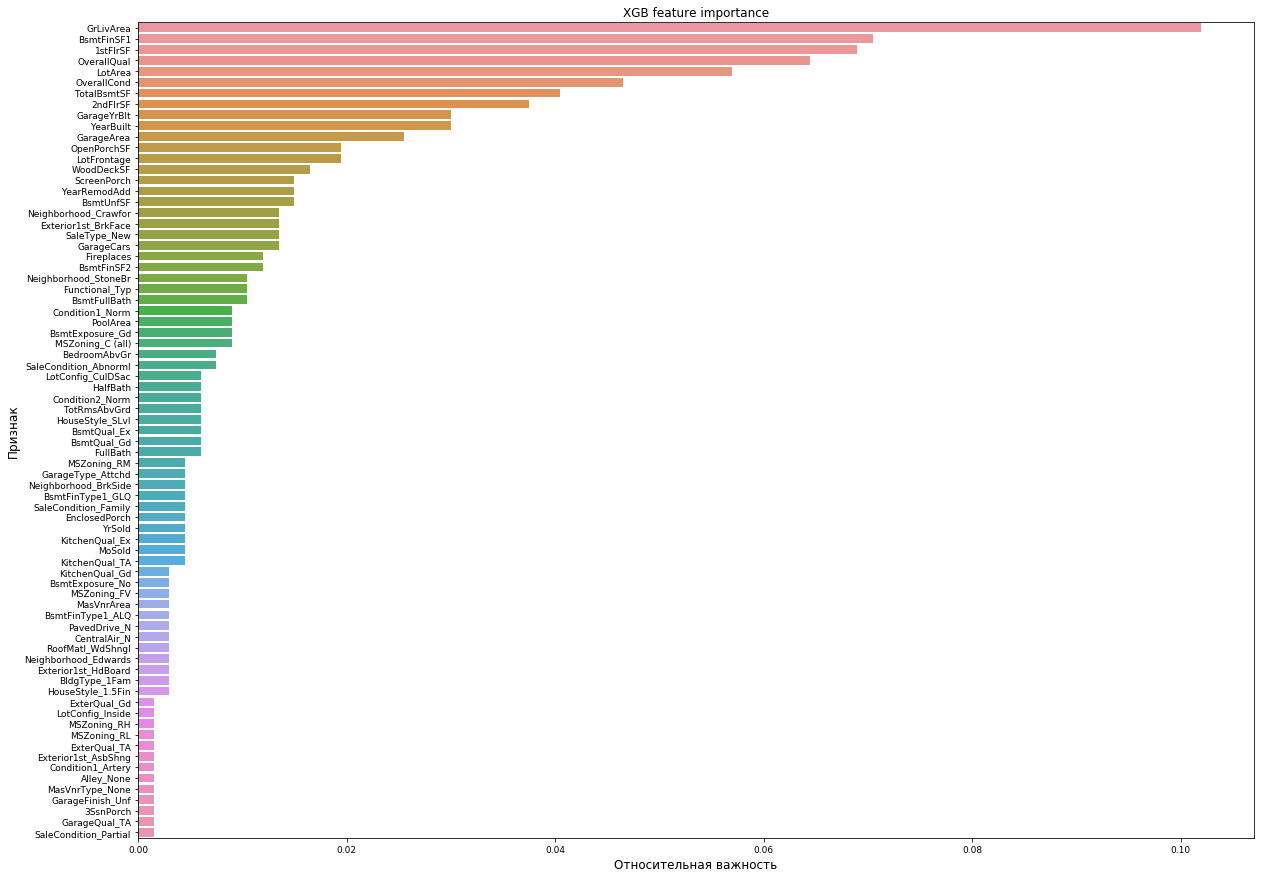

In [27]:
#проанализируем важность признаков с помощью XGBoost feature importance
model_xgb = xgb.XGBRegressor()
model_xgb.fit(train, y_train)

#отсортируем по важности
indices = np.argsort(model_xgb.feature_importances_)[::-1]
indices = indices[:75]

#посмотрим, что получилось
plt.subplots(figsize=(20, 15))
g = sns.barplot(y=train.columns[indices], x = model_xgb.feature_importances_[indices], orient='h')
g.set_xlabel("Относительная важность",fontsize=12)
g.set_ylabel("Признак",fontsize=12)
g.tick_params(labelsize=9)
g.set_title("XGB feature importance");

In [28]:
xgb_feat_red = SelectFromModel(model_xgb, prefit = True)

In [29]:
xgb_train = xgb_feat_red.transform(train)
xgb_test = xgb_feat_red.transform(test)

In [31]:
#оставили 50 наиболее значимых признаков
print(xgb_train.shape, xgb_test.shape)

(1460, 50) (1459, 50)


In [67]:
xgb_feat_columns = train.columns[xgb_feat_red.get_support()]

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(xgb_train, y_train, test_size=0.3, random_state=42)

In [33]:
print('X_train: ', X_train.shape, '\nX_test: ', X_test.shape, '\nY_train: ', Y_train.shape, '\nY_test: ', Y_test.shape)

X_train:  (1022, 50) 
X_test:  (438, 50) 
Y_train:  (1022,) 
Y_test:  (438,)


In [34]:
#для интереса посмотрим, что получается на линейных моделях
#lasso model
model_lasso = Lasso(alpha =0.001, random_state=1)
model_lasso.fit(X_train,Y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=1,
   selection='cyclic', tol=0.0001, warm_start=False)

In [35]:
model_lasso.score(X_test, Y_test)

0.8533555172767915

In [36]:
#Linear regression
model_lin = LinearRegression()
model_lin.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [37]:
model_lin.score(X_test, Y_test)

0.8533491585362347

In [46]:
#теперь используем случайный лес
model_rf = RandomForestRegressor(n_estimators=10, max_depth=5, min_samples_leaf=20, max_features=0.5, n_jobs=-1)
model_rf.fit(X_train,Y_train)   

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features=0.5, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=20, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [47]:
y_pred_rf = model_rf.predict(X_test)

In [50]:
model_rf.score(X_test, Y_test)

0.8102053654372885

In [68]:
X_train_df = pd.DataFrame(X_train, columns = xgb_feat_columns)

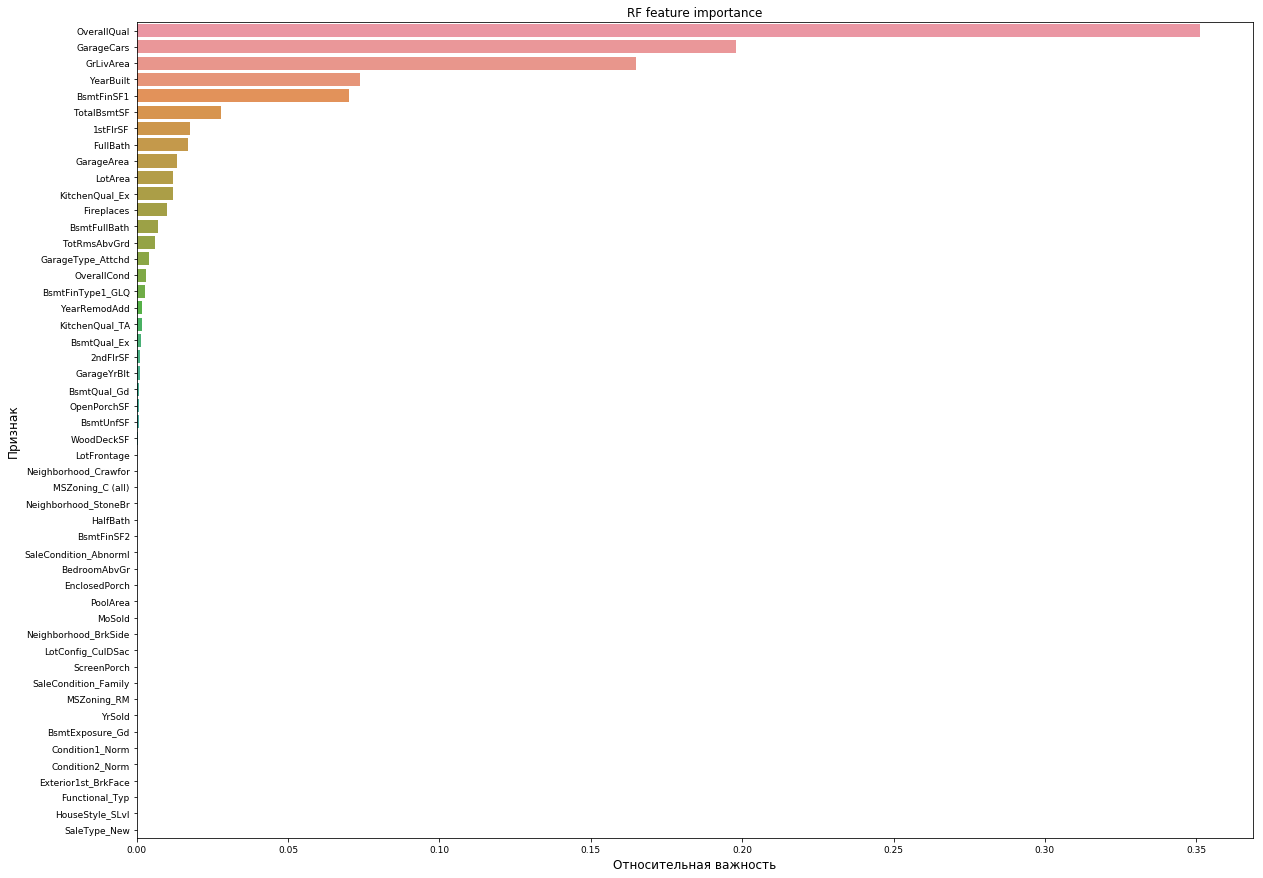

In [70]:
indices_rf = pd.Series(model_rf.feature_importances_).sort_values(ascending=False)

plt.subplots(figsize=(20, 15))
g = sns.barplot(y=X_train_df.columns[indices_rf.index], x = model_rf.feature_importances_[indices_rf.index], orient='h')
g.set_xlabel("Относительная важность",fontsize=12)
g.set_ylabel("Признак",fontsize=12)
g.tick_params(labelsize=9)
g.set_title("RF feature importance");

In [100]:
def get_meta_features(clf, X_train, Y_train, X_test, stack_cv):
    meta_train = np.zeros_like(Y_train, dtype=float)
    meta_test = np.zeros_like(Y_test, dtype=float)
    
    for i, (train_ind, test_ind) in enumerate(stack_cv.split(X_train, Y_train)):        
        
        clf.fit(X_train[train_ind], Y_train[train_ind])
        meta_train[test_ind] = clf.predict(X_train[test_ind])
        meta_test += clf.predict(X_test)
    
    return meta_train, meta_test / stack_cv.n_splits

In [101]:
from sklearn.model_selection import StratifiedKFold

stack_cv = StratifiedKFold(n_splits=10, random_state=555)

meta_train = []
meta_test = []
col_names = []

In [103]:
print('Lasso features...')
meta_tr, meta_te = get_meta_features(model_lasso, X_train, Y_train, X_test, stack_cv)
meta_train.append(meta_tr)
meta_test.append(meta_te)
col_names.append('lasso_pred')

Lasso features...


In [104]:
print('LinR features...')
meta_tr, meta_te = get_meta_features(model_lin, X_train, Y_train, X_test, stack_cv)
meta_train.append(meta_tr)
meta_test.append(meta_te)
col_names.append('linr_pred')

LinR features...


In [105]:
print('RF features...')
meta_tr, meta_te = get_meta_features(model_rf, X_train, Y_train, X_test, stack_cv)
meta_train.append(meta_tr)
meta_test.append(meta_te)
col_names.append('rf_pred')

RF features...


In [106]:
X_meta_train = pd.DataFrame(np.stack(meta_train, axis=1), columns=col_names)
X_meta_test = pd.DataFrame(np.stack(meta_test, axis=1), columns=col_names)

In [112]:
clf_lr_meta = LinearRegression()
clf_lr_meta.fit(X_meta_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [113]:
y_pred_meta_test = clf_lr_meta.predict(X_meta_test)

In [125]:
r2_score(Y_test, y_pred_meta_test)

0.871632996605396

In [ ]:
#Получили больший r2, т.о. использование ансамблей улучшает качество